<a href="https://colab.research.google.com/github/wongwara/AT2_Classification/blob/main/MLAA_Lab_6_Exercise_1_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Random Forest & ExtraTrees**


## Exercise 1: Binary Classification with Random Forest

We are going to use a modified version of the dataset from UCI Machine Learning Repository which contains the income census data for 30718 americans (https://archive.ics.uci.edu/ml/datasets/Adult).

The columns are:
1.   AGE: age of the person.
2.   WORKCLASS: class of work.
3.   EDUCATION_NUM: numeric education level.
4.   MARITAL_STATUS: marital status  of the person.
5.   OCCUPATION: occupation  of the person.
6.   RELATIONSHIP: type of relationship.
7.   SEX: sex of the person.
8.   HOURS_PER_WEEK: average number of hour working per week.
9.   INCOME: income level (<=50K or >50K).

We will be loading the data here:
https://raw.githubusercontent.com/aso-uts/mlaa/main/datasets/lab6/ex1/adult_income.csv

We want to predict whether an individual will earn more or less than $50,000 per year (**"income"**). This is a binary classification problem.

The steps are:
1.   Load and explore dataset
2.   Prepare Data
3.   Split Data
4.   Assess Baseline Model
5.   Train Initial RandomForest with Default Hyperparameter
6.   Reduce Overfitting with n_estimators
7.   Reduce Overfitting with max_depth
8.   Reduce Overfitting with min_samples_leaf
9.   Reduce Overfitting with max_features
10.  Features Importance

### 1. Load and Explore Dataset

**[1.1]** Import the pandas and numpy package

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
import pandas as pd
import numpy as np

**[1.2]** Create a variable called file_url containing the link to the CSV file and load the dataset into dataframe called df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
file_url = 'https://raw.githubusercontent.com/aso-uts/mlaa/main/datasets/lab6/ex1/adult_income.csv'
df = pd.read_csv(file_url)

In [ ]:
# Unit Tests
assert isinstance(file_url, str)
assert isinstance(df, pd.DataFrame)

**[1.3]** Display the first 5 rows of df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,sex,hours_per_week,income
0,39,State_gov,13,Never_married,Adm_clerical,Not_in_family,Male,40,<=50K
1,50,Self_emp_not_inc,13,Married_civ_spouse,Exec_managerial,Husband,Male,13,<=50K
2,38,Private,9,Divorced,Handlers_cleaners,Not_in_family,Male,40,<=50K
3,53,Private,7,Married_civ_spouse,Handlers_cleaners,Husband,Male,40,<=50K
4,28,Private,13,Married_civ_spouse,Prof_specialty,Wife,Female,40,<=50K


**[1.4]** Display the dimensions (shape) of df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.shape

(30718, 9)

**[1.5]** Display the summary (info) of df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30718 entries, 0 to 30717
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30718 non-null  int64 
 1   workclass       30718 non-null  object
 2   education_num   30718 non-null  int64 
 3   marital_status  30718 non-null  object
 4   occupation      30718 non-null  object
 5   relationship    30718 non-null  object
 6   sex             30718 non-null  object
 7   hours_per_week  30718 non-null  int64 
 8   income          30718 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.1+ MB


**[1.6]** Display the descriptive statictics of df


In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.describe()

,age,education_num,hours_per_week
count,30718.000000,30718.000000,30718.000000
mean,38.443584,10.130314,40.949313
std,13.118227,2.562469,11.985382
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


### 2. Prepare Data

**[2.1]** Create a copy of df and save it into a variable called df_cleaned


In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df_cleaned = df.copy()

In [ ]:
# Unit Tests
assert isinstance(df_cleaned, pd.DataFrame)
assert df_cleaned.shape == df.shape

**[2.3]** Create a variable called cat_cols containing the following items: 'workclass','marital_status','occupation','relationship','sex'

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
cat_cols = ['workclass','marital_status','occupation','relationship','sex'] 

In [ ]:
# Unit Tests
assert isinstance(cat_cols, list)
assert len(cat_cols) == 5

**[2.4]** One hot encode the categorical columns by using the "get_dummies" function from pandas

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df_cleaned = pd.get_dummies(df_cleaned, columns=cat_cols)

In [ ]:
# Unit Tests
assert df_cleaned.shape == (30718, 40)

**[2.5]** Display the first 5 rows of df_cleaned

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df_cleaned.head()

,age,education_num,hours_per_week,income,workclass_Federal_gov,workclass_Local_gov,workclass_Private,workclass_Self_emp_inc,workclass_Self_emp_not_inc,workclass_State_gov,...,occupation_Tech_support,occupation_Transport_moving,relationship_Husband,relationship_Not_in_family,relationship_Other_relative,relationship_Own_child,relationship_Unmarried,relationship_Wife,sex_Female,sex_Male
0,39,13,40,<=50K,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,50,13,13,<=50K,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,38,9,40,<=50K,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,53,7,40,<=50K,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,28,13,40,<=50K,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


**[2.6]**  Split the target (X) and the features (Y)

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y = df_cleaned.pop('income')
X = df_cleaned

In [ ]:
# Unit Tests
assert X.shape == (30718, 39)
assert y.shape == (30718,)

## 3. Split Data

**[3.1]** Print the frequencies of each value of the target 
variable

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y.value_counts(normalize=True)

<=50K    0.75096
>50K     0.24904
Name: income, dtype: float64


**[3.2]** Import train_test_split from sklearn.model_selection 

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.model_selection import train_test_split

**[3.3]** Split randomly the dataset with random_state=8 into 2 different sets: data (80%) and test (20%)

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
X_data, X_test, y_data, y_test = train_test_split (X, y, test_size=0.2, random_state=8)

**[3.4]** Print the frequencies of each value of the testing target

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_test.value_counts(normalize=True)

<=50K    0.75944
>50K     0.24056
Name: income, dtype: float64

**[3.5]** Split the data randomly with random_state=8 into 2 different sets: training (80%) and validation (20%)

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=8)

In [ ]:
# Unit Tests
assert X_train.shape == (19659, 39)
assert y_train.shape == (19659,)
assert X_val.shape == (4915, 39)
assert y_val.shape == (4915,)
assert X_test.shape == (6144, 39)
assert y_test.shape == (6144,)

## 4. Assess Baseline Model

**[4.1]** Find the mode of the target variable from the training set and print its value

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_mode = y_train.mode()
y_mode

0    <=50K
Name: income, dtype: object

**[4.2]** Create a numpy array with the same dimensions as for the training set called `y_base` filled with this value



In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_shape = (len(X_train), 1)
y_base = np.full(y_shape, y_mode)

**[4.3]** Import the accuracy score from sklearn

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.metrics import accuracy_score

**[4.4]** Display the accuracy score of this baseline model on the training set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
accuracy_score(y_train, y_base)

0.7476473879647998

## 5. Train Initial RandomForest with Default Hyperparameter

**[5.1]** Import the RandomForestClassifier from sklearn.ensemble

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.ensemble import RandomForestClassifier

**[5.2]** Instantiate the RandomForestClassifier class called rf1 with a random state=8

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
rf1 = RandomForestClassifier(random_state=8)

**[5.3]** Fit the RandomForest model

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
rf1.fit(X_train, y_train)

RandomForestClassifier(random_state=8)

**[5.4]** Calculate the accuracy of the RandomForest on the training and validation sets and print them

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
print(rf1.score(X_train, y_train))
print(rf1.score(X_val, y_val))

0.9650541736609186
0.8177009155645981


## 6. Reduce Overfitting with n_estimators

**[6.1]** Train a RandomForestClassifier model with n_estimators=50 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
rf2 = RandomForestClassifier(random_state=8, n_estimators=50).fit(X_train, y_train)
print(rf2.score(X_train, y_train))
print(rf2.score(X_val, y_val))

0.9644437662139478
0.8179043743641913


**[6.2]** Train a RandomForestClassifier model with n_estimators=200 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
rf2 = RandomForestClassifier(random_state=8, n_estimators=200).fit(X_train, y_train)
print(rf2.score(X_train, y_train))
print(rf2.score(X_val, y_val))

0.9650541736609186
0.8191251271617498


## 7. Reduce Overfitting with max_depth

**[7.1]** Print the average "**max_depth**" for rf2:

In [ ]:
np.mean([estimator.tree_.max_depth for estimator in rf2.estimators_])

37.395

**[7.2]** Train a RandomForestClassifier model with n_estimators=50, max_depth=10 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
rf3 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=10).fit(X_train, y_train)
print(rf3.score(X_train, y_train))
print(rf3.score(X_val, y_val))

0.846533394374078
0.8349949135300102


**[7.3]** Train a RandomForestClassifier model with n_estimators=50, max_depth=20 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
rf4 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=20).fit(X_train, y_train)
print(rf4.score(X_train, y_train))
print(rf4.score(X_val, y_val))

0.9393153263136477
0.834791454730417


**[7.4]** xTrain a RandomForestClassifier model with n_estimators=50, max_depth=15 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
rf5 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15).fit(X_train, y_train)
print(rf5.score(X_train, y_train))
print(rf5.score(X_val, y_val))

0.8917035454499211
0.8368260427263479


## 8.   Reduce Overfitting with min_samples_leaf

**[8.1]** Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=2 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
rf6 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=2).fit(X_train, y_train)
print(rf6.score(X_train, y_train))
print(rf6.score(X_val, y_val))

0.8656086270919172
0.8439471007121058


**[8.2]** Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=10 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
rf7 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=10).fit(X_train, y_train)
print(rf7.score(X_train, y_train))
print(rf7.score(X_val, y_val))

0.8395645760211607
0.8364191251271618


**[8.3]** Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=5 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
rf8 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=5).fit(X_train, y_train)
print(rf8.score(X_train, y_train))
print(rf8.score(X_val, y_val))

0.8487715550129712
0.8404883011190234


## 9.   Reduce Overfitting with max_features

**[9.1]** Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=2 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
rf9 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=2).fit(X_train, y_train)
print(rf9.score(X_train, y_train))
print(rf9.score(X_val, y_val))

0.8492293605981993
0.8329603255340794


**[9.2]** Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=5 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
rf10 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=5).fit(X_train, y_train)
print(rf10.score(X_train, y_train))
print(rf10.score(X_val, y_val))

0.8608271020906455
0.8366225839267548


**[9.3]** Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=None and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
rf11 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=None).fit(X_train, y_train)
print(rf11.score(X_train, y_train))
print(rf11.score(X_val, y_val))

0.8945521135357851
0.8362156663275687


**[9.4]** Print the accuracy score of the best model on the testing set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
print(rf7.score(X_test, y_test))

0.84130859375


**[9.5]** Import confusion_matrix, ConfusionMatrixDisplay from sklearn.metrics and matplotlib

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**[9.6]** Task: Plot the confusion matrics for the training, validation and testing sets

In [ ]:
# Placeholder for student's code

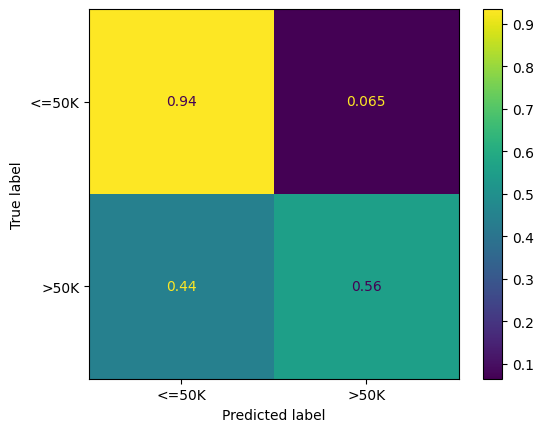

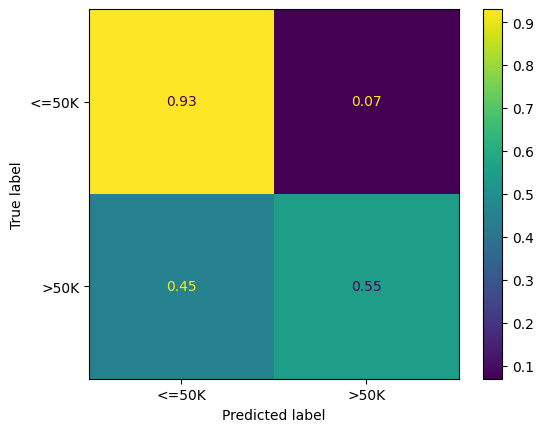

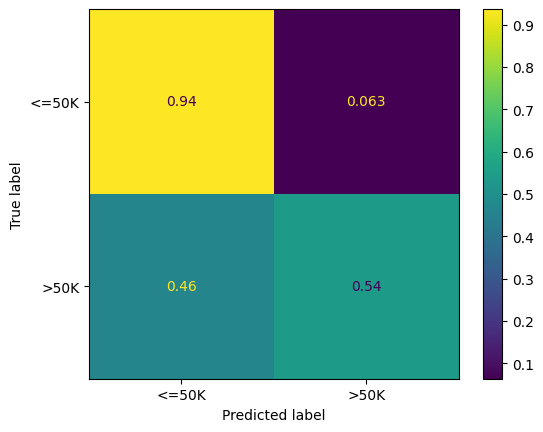

In [ ]:
# Solution
ConfusionMatrixDisplay.from_estimator(rf7, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(rf7, X_val, y_val, normalize='true')
ConfusionMatrixDisplay.from_estimator(rf7, X_test, y_test, normalize='true')

## 10.  Features Importance


**[10.1]** Task: Print the features importance of rf7

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
rf7.feature_importances_

array([1.07684813e-01, 1.81421477e-01, 6.34910891e-02, 2.49831265e-03,
       2.11712046e-03, 8.24463088e-03, 8.13653069e-03, 7.46001010e-03,
       1.29350603e-03, 0.00000000e+00, 1.53779911e-02, 0.00000000e+00,
       1.80617957e-01, 4.77953795e-04, 7.43455457e-02, 1.93173144e-03,
       6.98456837e-04, 3.24263933e-03, 0.00000000e+00, 5.06467067e-03,
       4.38021107e-02, 6.57313731e-03, 3.56025977e-03, 6.79344635e-03,
       1.77391920e-02, 3.31284068e-06, 3.40253416e-02, 1.54121194e-03,
       4.87070944e-03, 3.36587492e-03, 4.99700548e-03, 1.06022026e-01,
       2.04752344e-02, 7.08691427e-04, 1.72039642e-02, 7.98189006e-03,
       2.35509572e-02, 1.55371582e-02, 1.71440396e-02])

**[10.2]** Create a Dataframe with these values

In [ ]:
feat_imp_rf_df = pd.DataFrame(
    {
        'feature': X_train.columns,
     'feature_importance': rf7.feature_importances_
     }
)

In [ ]:
feat_imp_rf_df

,feature,feature_importance
0,education_num,0.181421
1,marital_status_Married_civ_spouse,0.180618
2,age,0.107685
3,relationship_Husband,0.106022
4,marital_status_Never_married,0.074346
5,hours_per_week,0.063491
6,occupation_Exec_managerial,0.043802
7,occupation_Prof_specialty,0.034025
8,relationship_Wife,0.023551
9,relationship_Not_in_family,0.020475


**[10.3]** Sort the previous dataframe and reset its index

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
feat_imp_rf_df = feat_imp_rf_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)

**[10.4]** Display the first 10 rows of this dataframe 

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
feat_imp_rf_df.head(10)

,feature,feature_importance
0,education_num,0.181421
1,marital_status_Married_civ_spouse,0.180618
2,age,0.107685
3,relationship_Husband,0.106022
4,marital_status_Never_married,0.074346
5,hours_per_week,0.063491
6,occupation_Exec_managerial,0.043802
7,occupation_Prof_specialty,0.034025
8,relationship_Wife,0.023551
9,relationship_Not_in_family,0.020475


**[10.5]** We can visualise this information on a graph

In [ ]:
import altair as alt

alt.Chart(feat_imp_rf_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)